In [2]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd

In [3]:
df = pd.DataFrame([10,20,30,40], columns=['number'], index=['a','b','c','d'] )
df

,number
a,10
b,20
c,30
d,40


In [4]:
df.columns #列出列名.都带个u

Index([u'number'], dtype='object')

In [5]:
df.index #列出所有index

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [6]:
df.ix['a'] #通过index为a，列出其数值

number    10
Name: a, dtype: int64

In [7]:
df.ix[['a','c']] #调用两个index的值，但是用了两层list的方括号[]，不知道为什么

,number
a,10
c,30


In [8]:
df.ix[df.index[1:3]] #列出区间值

,number
b,20
c,30


In [9]:
df.sum() #按列求和

number    100
dtype: int64

In [10]:
df.apply(lambda x: x ** 2) #apply一个函数

,number
a,100
b,400
c,900
d,1600


In [11]:
df ** 2 #具有和numpy一样的属性

,number
a,100
b,400
c,900
d,1600


In [12]:
df['float'] = (1.5,2.5,3.5,4.5) #可以用[]调用列，而不是df.ix调用行。此处是增加一行
df

,number,float
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [13]:
df['number'] #调用列

a    10
b    20
c    30
d    40
Name: number, dtype: int64

In [14]:
df['names'] = pd.DataFrame(['Yves','Antonio','Luis','Tiago'], index=['d','a','b','c']) #创建新的DataFrame作为新列
df

,number,float,names
a,10,1.5,Antonio
b,20,2.5,Luis
c,30,3.5,Tiago
d,40,4.5,Yves


In [15]:
df.append({'number':29, 'float':2.3, 'names':'Hugo'}, ignore_index=True) #增加行用append命令，然后忽略index，变成数字indez

,number,float,names
0,10,1.5,Antonio
1,20,2.5,Luis
2,30,3.5,Tiago
3,40,4.5,Yves
4,29,2.3,Hugo


In [16]:
df = df.append(pd.DataFrame({'number': 100, 'float': 5.75, 'names': 'Henry'}, index=['z',])) #用一个DataFrame作为加入的一行. z后面多一个,号
df

,float,names,number
a,1.50,Antonio,10
b,2.50,Luis,20
c,3.50,Tiago,30
d,4.50,Yves,40
z,5.75,Henry,100


In [17]:
df.join(pd.DataFrame([1,3,4,5,4], 
               index=['a','b','c','d','y'], 
               columns=['squares'])) #pd中，index和columns后面都要加[]。此处z索引是空值

,float,names,number,squares
a,1.50,Antonio,10,1.0
b,2.50,Luis,20,3.0
c,3.50,Tiago,30,4.0
d,4.50,Yves,40,5.0
z,5.75,Henry,100,NaN


从截至目前的学习看，pd更注重index和columns，而np则不注重，多用默认的数字编号。 
pd 的append是增加一行， join是增加列

In [18]:
df = df.join(pd.DataFrame([1, 4, 9, 16, 25],  #以DataFrame格式来增加
                    index=['a', 'b', 'c', 'd', 'y'],
                    columns=['squares',]), # 增加一列
                    how='outer') # 如果新加入的index不属于已存在的，则增加一行。 
df

,float,names,number,squares
a,1.50,Antonio,10.0,1.0
b,2.50,Luis,20.0,4.0
c,3.50,Tiago,30.0,9.0
d,4.50,Yves,40.0,16.0
y,NaN,NaN,NaN,25.0
z,5.75,Henry,100.0,NaN


In [19]:
df[['float','number']].sum() #对列求和，但是为什双[]


float      17.75
number    200.00
dtype: float64

In [20]:
df.sum()

float       17.75
number     200.00
squares     55.00
dtype: float64

In [21]:
df.std()

float       1.662077
number     35.355339
squares     9.669540
dtype: float64

In [22]:
a = np.random.standard_normal((9,4)).round(6) #建立随机数组
df = pd.DataFrame(a) #建立df的通常好做法是将numpy建立的array变成pandas的DataFrame对象。pandas会保留原来的结构，仅仅增加index。
df #index和columns本身并不是数据结构的组成部分

,0,1,2,3
0,-0.501583,-0.218192,-0.740866,-1.022977
1,-0.173219,-1.478537,0.683800,-1.047977
2,-0.291966,-0.845079,0.398866,-0.339667
3,1.370256,-0.763090,0.159531,-0.996757
4,-0.356146,-2.513928,0.276465,-0.335229
5,1.039268,0.733340,-1.041636,2.570859
6,-2.104370,0.060652,-1.752585,1.552769
7,0.085678,0.026727,-0.934754,0.815273
8,-1.151209,0.422374,0.574511,-0.084723


In [23]:
df.ix[0].sum() #调用第一行

-2.483618

In [24]:
df.columns = ['No1','No2','No3','No4'] #改变columns名称
df

,No1,No2,No3,No4
0,-0.501583,-0.218192,-0.740866,-1.022977
1,-0.173219,-1.478537,0.683800,-1.047977
2,-0.291966,-0.845079,0.398866,-0.339667
3,1.370256,-0.763090,0.159531,-0.996757
4,-0.356146,-2.513928,0.276465,-0.335229
5,1.039268,0.733340,-1.041636,2.570859
6,-2.104370,0.060652,-1.752585,1.552769
7,0.085678,0.026727,-0.934754,0.815273
8,-1.151209,0.422374,0.574511,-0.084723


In [25]:
df['No1'][0] #奇怪，这里能调用。 注意：先写列，再写行

-0.501583

pandas对于时间标签的空值能力是最重要的

In [26]:
dates = pd.date_range('2015-1-1', periods=9, freq='M') #建立时间序列
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [27]:
df.index = dates #以时间DatetimeIndex对象为index
df

,No1,No2,No3,No4
2015-01-31,-0.501583,-0.218192,-0.740866,-1.022977
2015-02-28,-0.173219,-1.478537,0.683800,-1.047977
2015-03-31,-0.291966,-0.845079,0.398866,-0.339667
2015-04-30,1.370256,-0.763090,0.159531,-0.996757
2015-05-31,-0.356146,-2.513928,0.276465,-0.335229
2015-06-30,1.039268,0.733340,-1.041636,2.570859
2015-07-31,-2.104370,0.060652,-1.752585,1.552769
2015-08-31,0.085678,0.026727,-0.934754,0.815273
2015-09-30,-1.151209,0.422374,0.574511,-0.084723


In [28]:
np.array(df).round(6) #将DataFrame变回np

array([[-0.501583, -0.218192, -0.740866, -1.022977],
       [-0.173219, -1.478537,  0.6838  , -1.047977],
       [-0.291966, -0.845079,  0.398866, -0.339667],
       [ 1.370256, -0.76309 ,  0.159531, -0.996757],
       [-0.356146, -2.513928,  0.276465, -0.335229],
       [ 1.039268,  0.73334 , -1.041636,  2.570859],
       [-2.10437 ,  0.060652, -1.752585,  1.552769],
       [ 0.085678,  0.026727, -0.934754,  0.815273],
       [-1.151209,  0.422374,  0.574511, -0.084723]])

In [29]:
df.sum() #功能强大，如果有空值，直接忽略。

No1   -2.083291
No2   -4.575733
No3   -2.376668
No4    1.111571
dtype: float64

In [30]:
df.mean()

No1   -0.231477
No2   -0.508415
No3   -0.264074
No4    0.123508
dtype: float64

In [31]:
df.cumsum()

,No1,No2,No3,No4
2015-01-31,-0.501583,-0.218192,-0.740866,-1.022977
2015-02-28,-0.674802,-1.696729,-0.057066,-2.070954
2015-03-31,-0.966768,-2.541808,0.341800,-2.410621
2015-04-30,0.403488,-3.304898,0.501331,-3.407378
2015-05-31,0.047342,-5.818826,0.777796,-3.742607
2015-06-30,1.086610,-5.085486,-0.263840,-1.171748
2015-07-31,-1.017760,-5.024834,-2.016425,0.381021
2015-08-31,-0.932082,-4.998107,-2.951179,1.196294
2015-09-30,-2.083291,-4.575733,-2.376668,1.111571


In [32]:
df.describe() #进行基本的统计描述

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.231477,-0.508415,-0.264074,0.123508
std,1.044636,1.015147,0.866762,1.270875
min,-2.104370,-2.513928,-1.752585,-1.047977
25%,-0.501583,-0.845079,-0.934754,-0.996757
50%,-0.291966,-0.218192,0.159531,-0.335229
75%,0.085678,0.060652,0.398866,0.815273
max,1.370256,0.733340,0.683800,2.570859


In [33]:
df.describe()['No1']['count']

9.0

In [34]:
np.square(df) #可以对df使用np的计算函数

,No1,No2,No3,No4
2015-01-31,0.251586,0.047608,0.548882,1.046482
2015-02-28,0.030005,2.186072,0.467582,1.098256
2015-03-31,0.085244,0.714159,0.159094,0.115374
2015-04-30,1.877602,0.582306,0.025450,0.993525
2015-05-31,0.126840,6.319834,0.076433,0.112378
2015-06-30,1.080078,0.537788,1.085006,6.609316
2015-07-31,4.428373,0.003679,3.071554,2.411092
2015-08-31,0.007341,0.000714,0.873765,0.664670
2015-09-30,1.325282,0.178400,0.330063,0.007178


In [35]:
np.square(df).sum()

No1     9.212350
No2    10.570559
No3     6.637830
No4    13.058270
dtype: float64

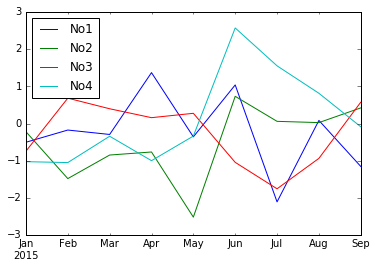

In [36]:
%matplotlib inline
df.plot()


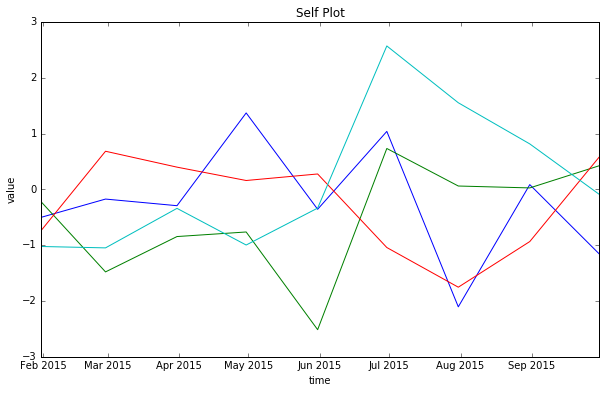

In [37]:
import matplotlib.pyplot as plt #自创使用plot方法画pd的图
plt.figure(figsize=(10,6))
plt.plot(df)
plt.ylabel('value')
plt.xlabel('time')
plt.title('Self Plot')
plt.grid=True




In [38]:
type(df) #目前我们使用的都是pd的核心DataFrame对象

pandas.core.frame.DataFrame

In [39]:
type(df['No1']) #如果仅取一列，则是series类对象

pandas.core.series.Series

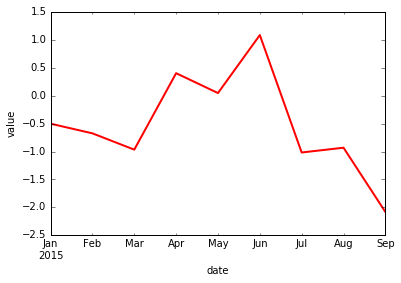

In [40]:
df['No1'].cumsum().plot(style='r', lw=2)
plt.xlabel('date')
plt.ylabel('value')
plt.grid=True

In [41]:
df['Quarter'] = ['Q1','Q1','Q1','Q2','Q2','Q2','Q3','Q3','Q3'] #增加一列，表示季度
df

,No1,No2,No3,No4,Quarter
2015-01-31,-0.501583,-0.218192,-0.740866,-1.022977,Q1
2015-02-28,-0.173219,-1.478537,0.683800,-1.047977,Q1
2015-03-31,-0.291966,-0.845079,0.398866,-0.339667,Q1
2015-04-30,1.370256,-0.763090,0.159531,-0.996757,Q2
2015-05-31,-0.356146,-2.513928,0.276465,-0.335229,Q2
2015-06-30,1.039268,0.733340,-1.041636,2.570859,Q2
2015-07-31,-2.104370,0.060652,-1.752585,1.552769,Q3
2015-08-31,0.085678,0.026727,-0.934754,0.815273,Q3
2015-09-30,-1.151209,0.422374,0.574511,-0.084723,Q3


In [42]:
groups = df.groupby('Quarter') #将DF根据Quarter 列进行分组
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.322256,-0.847269,0.113933,-0.803540
Q2,0.684459,-0.847893,-0.201880,0.412958
Q3,-1.056634,0.169918,-0.704276,0.761106


In [43]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.173219,-0.218192,0.683800,-0.339667
Q2,1.370256,0.733340,0.276465,2.570859
Q3,0.085678,0.422374,0.574511,1.552769


In [44]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [45]:
df['Odd_Even'] = ['Odd','Even','Odd','Even','Odd','Even','Odd','Even','Odd'] #再增加一列
df

,No1,No2,No3,No4,Quarter,Odd_Even
2015-01-31,-0.501583,-0.218192,-0.740866,-1.022977,Q1,Odd
2015-02-28,-0.173219,-1.478537,0.683800,-1.047977,Q1,Even
2015-03-31,-0.291966,-0.845079,0.398866,-0.339667,Q1,Odd
2015-04-30,1.370256,-0.763090,0.159531,-0.996757,Q2,Even
2015-05-31,-0.356146,-2.513928,0.276465,-0.335229,Q2,Odd
2015-06-30,1.039268,0.733340,-1.041636,2.570859,Q2,Even
2015-07-31,-2.104370,0.060652,-1.752585,1.552769,Q3,Odd
2015-08-31,0.085678,0.026727,-0.934754,0.815273,Q3,Even
2015-09-30,-1.151209,0.422374,0.574511,-0.084723,Q3,Odd


In [46]:
groups =  df.groupby(['Quarter','Odd_Even']) #根据两列进行分组
groups.size()


Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [47]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even     -0.173219 -1.478537  0.683800 -1.047977
        Odd      -0.396775 -0.531636 -0.171000 -0.681322
Q2      Even      1.204762 -0.014875 -0.441053  0.787051
        Odd      -0.356146 -2.513928  0.276465 -0.335229
Q3      Even      0.085678  0.026727 -0.934754  0.815273
        Odd      -1.627790  0.241513 -0.589037  0.734023

使用pandas内建的DataReader进行网络数据读取

In [1]:
import pandas.io.data as web
import datetime
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2013, 1, 27)
gdp = web.DataReader("GDP", "fred", start, end) # 从fred数据源读取时间序列数据
gdp


C:\Anaconda2\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


,GDP
DATE,
2010-01-01,14681.1
2010-04-01,14888.6
2010-07-01,15057.7
2010-10-01,15230.2
2011-01-01,15238.4
2011-04-01,15460.9
2011-07-01,15587.1
2011-10-01,15785.3
2012-01-01,15973.9


In [2]:
import pandas.io.data as web
import datetime
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2013, 1, 27)
WTI = web.DataReader("MCOILWTICO", "fred", start, end) # 从fred数据源读取WTI价格数据

In [2]:
import pandas.io.data as web
import datetime
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2013, 1, 27)
f = web.DataReader("F", 'google', start, end) #获取google finance的价格数据
f.ix['2010-01-05']

Open      1.045000e+01
High      1.124000e+01
Low       1.040000e+01
Close     1.096000e+01
Volume    2.156201e+08
Name: 2010-01-05 00:00:00, dtype: float64

In [ ]:
import pandas.io.data as web
import datetime 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
%matplotlib inline
start = datetime.datetime(2010,7,1)
end = datetime.datetime(2016,7,20)
df = web.DataReader('NYSE:VALE', 'google', start, end)
df[['Close']].plot(figsize=(12,8), style='b', kind='bar')
plt.grid(True)

In [ ]:
from pandas.io import wb #从世界银行获取数据 world bank
gdp_p_capita = wb.search('gdp.*capita.*const').iloc[:,:2]


In [48]:
import pandas.io.data as web #引入工具，支持： yahoo, google, st louis fed, kenneth french data library, world bank 
DAX = web.DataReader(name='^GDAXI', data_source='yahoo', start='2010-6-1')
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1569 entries, 2010-06-01 to 2016-07-22
Data columns (total 6 columns):
Open         1569 non-null float64
High         1569 non-null float64
Low          1569 non-null float64
Close        1569 non-null float64
Volume       1569 non-null int64
Adj Close    1569 non-null float64
dtypes: float64(5), int64(1)
memory usage: 85.8 KB


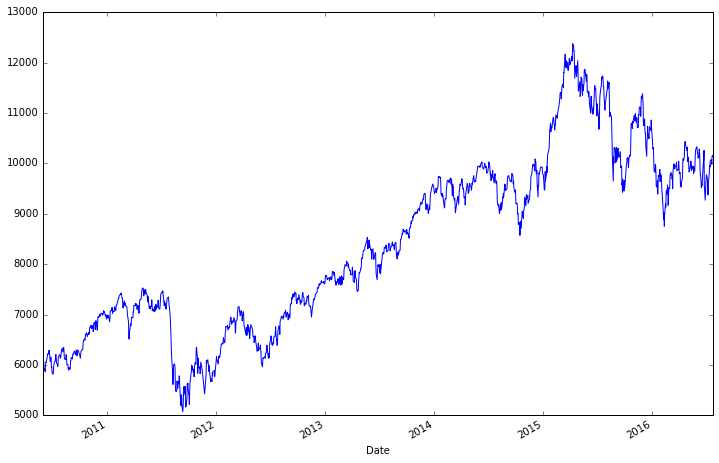

In [49]:
DAX['Close'].plot(figsize=(12,8))

In [50]:
DAX.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-01,5943.939941,6012.040039,5833.609863,5981.270020,32624200,5981.270020
2010-06-02,5923.479980,5992.209961,5869.350098,5981.200195,27324700,5981.200195
2010-06-03,6075.680176,6101.830078,6046.379883,6054.629883,27857500,6054.629883
2010-06-04,6081.470215,6114.580078,5912.899902,5938.879883,36808500,5938.879883
2010-06-07,5876.479980,5954.470215,5851.930176,5904.950195,32367400,5904.950195


In [51]:
'''
%%time
DAX['Ret_Loop'] = 0.0 # 增加一个空列
for i in range(1, len(DAX)): #跳过了第一个
    DAX['Ret_Loop'][i] = np.log(DAX['Close'][i] / DAX['Close'][i - 1]) #计算log rate
'''

"\n%%time\nDAX['Ret_Loop'] = 0.0 # \xe5\xa2\x9e\xe5\x8a\xa0\xe4\xb8\x80\xe4\xb8\xaa\xe7\xa9\xba\xe5\x88\x97\nfor i in range(1, len(DAX)): #\xe8\xb7\xb3\xe8\xbf\x87\xe4\xba\x86\xe7\xac\xac\xe4\xb8\x80\xe4\xb8\xaa\n    DAX['Ret_Loop'][i] = np.log(DAX['Close'][i] / DAX['Close'][i - 1]) #\xe8\xae\xa1\xe7\xae\x97log rate\n"

In [52]:
DAX.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-01,5943.939941,6012.040039,5833.609863,5981.270020,32624200,5981.270020
2010-06-02,5923.479980,5992.209961,5869.350098,5981.200195,27324700,5981.200195
2010-06-03,6075.680176,6101.830078,6046.379883,6054.629883,27857500,6054.629883
2010-06-04,6081.470215,6114.580078,5912.899902,5938.879883,36808500,5938.879883
2010-06-07,5876.479980,5954.470215,5851.930176,5904.950195,32367400,5904.950195


In [53]:
%%time
DAX['Return'] = np.log(DAX['Close'] / DAX['Close'].shift(1)) #避免loop，回错一格

Wall time: 65 ms


In [54]:
DAX.head()

,Open,High,Low,Close,Volume,Adj Close,Return
Date,,,,,,,
2010-06-01,5943.939941,6012.040039,5833.609863,5981.270020,32624200,5981.270020,NaN
2010-06-02,5923.479980,5992.209961,5869.350098,5981.200195,27324700,5981.200195,-0.000012
2010-06-03,6075.680176,6101.830078,6046.379883,6054.629883,27857500,6054.629883,0.012202
2010-06-04,6081.470215,6114.580078,5912.899902,5938.879883,36808500,5938.879883,-0.019303
2010-06-07,5876.479980,5954.470215,5851.930176,5904.950195,32367400,5904.950195,-0.005730


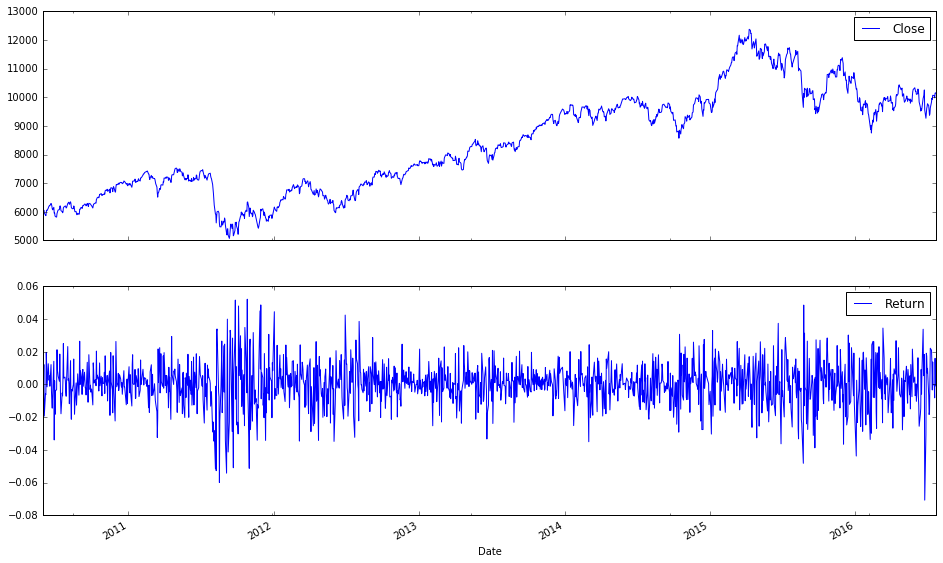

In [55]:
DAX[['Close','Return']].plot(subplots=True, style='b', figsize=(16,10))
plt.grid = True

In [56]:
DAX['42nd'] = pd.rolling_mean(DAX['Close'], window=42)
DAX['252nd'] = pd.rolling_mean(DAX['Close'], window=252)
DAX.tail()


,Open,High,Low,Close,Volume,Adj Close,Return,42nd,252nd
Date,,,,,,,,,
2016-07-18,10079.030273,10160.299805,10011.839844,10063.129883,68620600,10063.129883,-0.000375,9891.503116,10155.933900
2016-07-19,10038.950195,10050.769531,9923.639648,9981.240234,67213700,9981.240234,-0.008171,9893.055990,10149.825052
2016-07-20,10054.540039,10146.709961,9991.650391,10142.009766,77317900,10142.009766,0.015979,9900.192174,10144.388145
2016-07-21,10195.400391,10195.650391,10090.120117,10156.209961,94605600,10156.209961,0.001399,9902.546945,10139.661001
2016-07-22,10130.509766,10181.240234,10073.280273,10147.459961,60843200,10147.459961,-0.000862,9901.171945,10136.054095


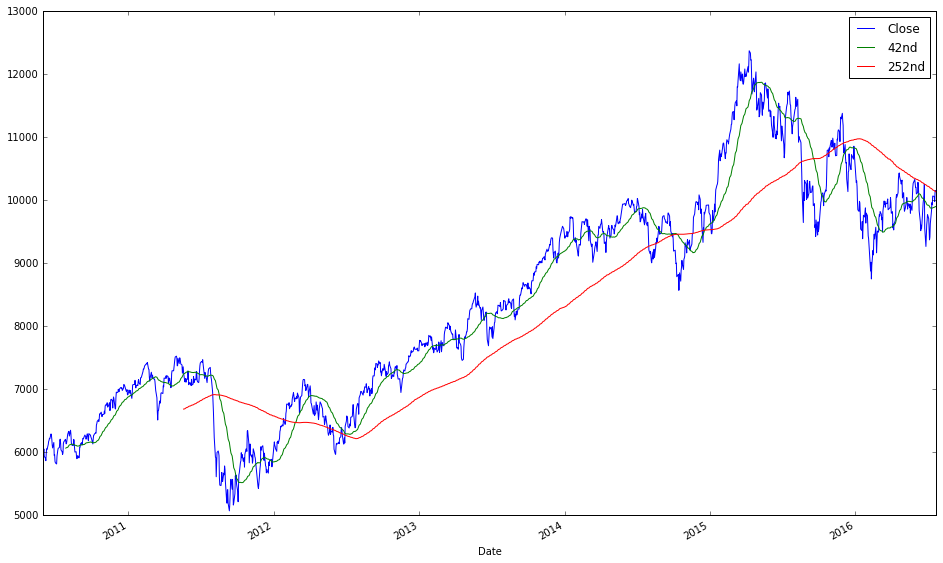

In [57]:
DAX[['Close','42nd','252nd']].plot(figsize=(16,10))
plt.grid = True

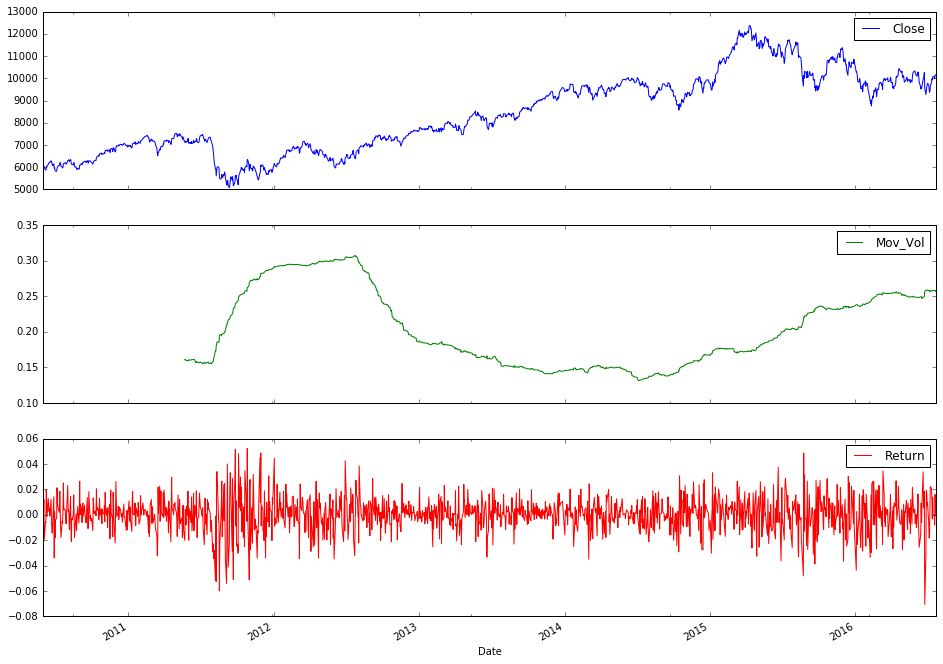

In [58]:
import math #引入数学库
DAX['Mov_Vol'] = pd.rolling_std(DAX['Return'], window=252) * math.sqrt(252) #移动年化波动率
DAX[['Close','Mov_Vol','Return']].plot(subplots=True, figsize=(16,12)) #价格与波动性的走势的反向
plt.grid = True


In [1]:
import pandas as pd
from urllib import urlretrieve #引入一个地址库
es_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/hbrbcpe.txt' #两个指数的地址
vs_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vstoxx.txt'
urlretrieve(es_url,'./data/es.txt') #从网站提取文件。必须提前在根目录下建立data文件夹，储存文件储存
urlretrieve(vs_url,'./data/vs.txt')
#!ls-o .data / *.txt #相当于windows下的 dir，打印文件列表
lines = open('./data/es.txt').readlines() #如果是csv文件则df = pd.read_csv('data/test_pwt.csv')
lines = [line.replace(' ','') for line in lines] #变成list，同时将空格取消


pd的复选格式：df.ix[2:5, ['country', 'tcgdp']] 

In [2]:
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

可以看出包含很多无用的表头信息

In [3]:
for line in lines[3383:3386]: #后面的数据就都是规范的了
    print line

07.01.2000;4452.51;4648.27;359.75;395.36;410.02;324.82;6990.27;574.81

10.01.2000;4511.64;4714.03;365.39;401.41;415.86;330.06;7181.90;589.27

11.01.2000;4462.60;4671.50;362.93;399.42;413.87;327.09;7179.33;587.96



In [62]:
new_file = open('./data/es50.txt','w') #以可写方式打开一个新的文本文件，之前不存在，一并建立
new_file.writelines('date' + lines[3][:-1] + ';Del'+ lines[3][-1] ) #lines本身是一个list，写入 date+第四个元素的开始至倒数第一个字符...
new_file.writelines(lines[4:])
new_file.close()
lines2 = open('./data/es50.txt','r')
lines3 = lines2.readlines()
lines3[:5] #\n是空行格的意思。如果用print则不显示，如果是用[]直接调用，则显示。而且格式上显示为另起一行。在列中成为另起一个元素


['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;Del\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [63]:
new_file.close()

In [64]:
es = pd.read_csv('./data/es50.txt', index_col=0, parse_dates=True, sep=';', dayfirst=True)
np.round(es.tail())


,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,Del
date,,,,,,,,,
2016-04-26,2923.0,3121.0,347.0,330.0,412.0,354.0,9395.0,588.0,NaN
2016-04-27,2927.0,3130.0,348.0,332.0,413.0,354.0,9424.0,589.0,NaN
2016-04-28,2932.0,3125.0,349.0,332.0,414.0,355.0,9459.0,592.0,NaN
2016-04-29,2856.0,3028.0,341.0,324.0,405.0,349.0,9278.0,582.0,NaN
2016-05-02,2852.0,3033.0,341.0,324.0,405.0,348.0,9238.0,579.0,NaN


In [65]:
type(es)

pandas.core.frame.DataFrame

In [66]:
es.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7562 entries, 1986-12-31 to 2016-05-02
Data columns (total 9 columns):
SX5P    7562 non-null float64
SX5E    7562 non-null float64
SXXP    7562 non-null float64
SXXE    7562 non-null float64
SXXF    7562 non-null float64
SXXA    7562 non-null float64
DK5F    7562 non-null float64
DKXF    7562 non-null float64
Del     0 non-null float64
dtypes: float64(9)
memory usage: 590.8 KB


In [67]:
del es['Del'] #删除多余的列，那之前为什么要加上呢？

In [68]:
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
date,,,,,,,,
2016-04-26,2922.57,3121.29,347.31,330.30,411.75,353.79,9395.03,587.73
2016-04-27,2927.31,3130.43,348.32,331.69,413.25,354.41,9424.15,589.23
2016-04-28,2932.00,3125.43,348.90,331.76,413.78,355.47,9459.04,591.95
2016-04-29,2856.28,3028.21,341.48,323.70,404.71,348.87,9278.19,581.67
2016-05-02,2852.10,3032.60,341.24,324.22,404.91,347.90,9238.16,578.79


In [69]:
cols = ['SX5P','SX5E','SXXP','SXXE','SXXF','SXXA','DK5F','DKXF']
es = pd.read_csv(es_url, index_col=0, 
                         parse_dates=True, 
                         sep=';', 
                         dayfirst=True,
                         header=None,
                         skiprows=4,
                         names=cols) #利用read_csv的高级功能。直接读取网络csv,比关切去除无用的表头和列。更高级，更简便
'''
parse_date 分析，解读日期
dayfirst : boolean, default False 欧洲时间数据规范，DD/MM
    DD/MM format dates, international and European format

该方法并没有在本地储存文件

'''
type(es)

pandas.core.frame.DataFrame

In [70]:
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-04-26,2922.57,3121.29,347.31,330.30,411.75,353.79,9395.03,587.73
2016-04-27,2927.31,3130.43,348.32,331.69,413.25,354.41,9424.15,589.23
2016-04-28,2932.00,3125.43,348.90,331.76,413.78,355.47,9459.04,591.95
2016-04-29,2856.28,3028.21,341.48,323.70,404.71,348.87,9278.19,581.67
2016-05-02,2852.10,3032.60,341.24,324.22,404.91,347.90,9238.16,578.79


In [71]:
vs = pd.read_csv('./data/vs.txt', index_col=0,  #vs的数据比较简单，直接从本地读取就可以。但是是9列
                                  header=2, #number of header rows。指定第几行是columns的名称
                                  parse_dates=True, 
                                  dayfirst=True)
vs.tail()
'''
pd.read_csv() 中的header参数是说明第几行，或者某几行作为df的columns的名称。如果0，表示第一行，如果是[1,2,5]表示某几行。None表示没有
'''

,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8
Date,,,,,,,,,
2016-02-08,33.3917,34.7251,33.2189,31.8308,31.4783,30.6941,30.3705,29.8478,29.2559
2016-02-09,33.9664,35.7884,33.7800,32.6220,32.2459,31.5572,31.1659,30.5339,29.9000
2016-02-10,33.4528,34.6020,33.3637,32.1438,32.0018,31.2099,30.9937,30.8174,30.2533
2016-02-11,38.3051,41.2095,38.1347,35.8676,35.1073,33.7847,33.4126,32.2234,31.2124
2016-02-12,35.6846,35.3849,35.6965,34.1404,33.8645,32.9590,32.8208,32.3189,31.8194


In [72]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX' : es['SX5E'][(es.index > dt.datetime(1999,1,1)) & (es.index < dt.datetime(2015,1,1))]}) #提取某一事件后的数据
data = data.join(pd.DataFrame({'VSTOXX' : vs['V2TX'][(vs.index > dt.datetime(1999,1,1)) & (vs.index < dt.datetime(2015,1,1))]}))
'''
注意时间区间的取值方法
'''


'\n\xe6\xb3\xa8\xe6\x84\x8f\xe6\x97\xb6\xe9\x97\xb4\xe5\x8c\xba\xe9\x97\xb4\xe7\x9a\x84\xe5\x8f\x96\xe5\x80\xbc\xe6\x96\xb9\xe6\xb3\x95\n'

In [73]:
data = data.fillna(method='ffill') # 用forward方法填充数据
data.head()

,EUROSTOXX,VSTOXX
1999-01-04,3543.10,18.2033
1999-01-05,3604.67,29.6912
1999-01-06,3685.36,25.1670
1999-01-07,3627.87,32.5205
1999-01-08,3616.57,33.2296


In [74]:
datamodel = pd.ols(y=data['EUROSTOXX'], x=data['VSTOXX'])
datamodel


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         4100
Number of Degrees of Freedom:   2

R-squared:         0.1122
Adj R-squared:     0.1120

Rmse:            744.9538

F-stat (1, 4098):   517.8786, p-value:     0.0000

Degrees of Freedom: model 1, resid 4098

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x   -26.7755     1.1766     -22.76     0.0000   -29.0816   -24.4694
     intercept  3930.5911    31.9275     123.11     0.0000  3868.0131  3993.1691
---------------------------------End of Summary---------------------------------

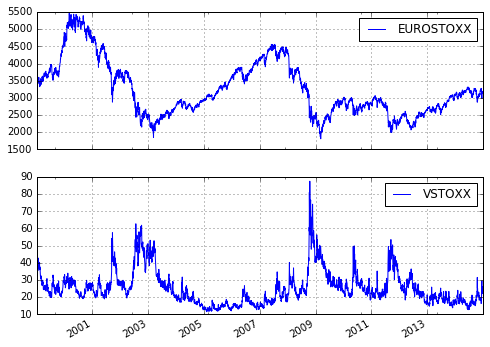

In [75]:
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
plt.grid = True

In [76]:
rets = np.log(data / data.shift(1)) #计算log收益率
rets.head()
rets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4100 entries, 1999-01-04 to 2014-12-31
Data columns (total 2 columns):
EUROSTOXX    4099 non-null float64
VSTOXX       4099 non-null float64
dtypes: float64(2)
memory usage: 96.1 KB


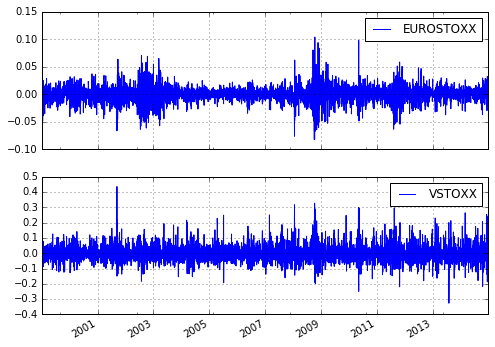

In [77]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8,6)) # log收益率的图
plt.grid = True

In [78]:
xdat = rets['EUROSTOXX']
ydat = rets['VSTOXX']

In [79]:
model = pd.ols(y=ydat, x=xdat)  #用pd进行最小二乘法回归
model #结果证明，是历史数据有问题，修改取值区间就解决了


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         4099
Number of Degrees of Freedom:   2

R-squared:         0.5339
Adj R-squared:     0.5338

Rmse:              0.0392

F-stat (1, 4097):  4692.5019, p-value:     0.0000

Degrees of Freedom: model 1, resid 4097

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -2.7847     0.0407     -68.50     0.0000    -2.8643    -2.7050
     intercept     0.0000     0.0006       0.01     0.9895    -0.0012     0.0012
---------------------------------End of Summary---------------------------------

In [80]:
model.beta #返回各个截距项，是一个数组，index为[0],[1]

x           -2.784653
intercept    0.000008
dtype: float64

In [81]:
rets.corr() #DataFrame自动计算correlation矩阵

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.730668
VSTOXX,-0.730668,1.000000


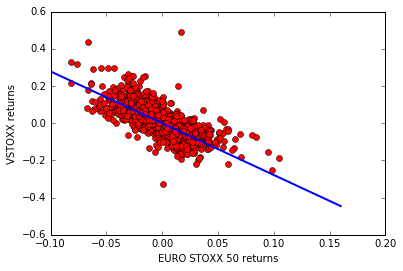

In [101]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore') # import seaborn as sns; sns.set()
%matplotlib inline
plt.plot(xdat, ydat, 'ro')
ax = plt.axis() #获取坐标轴左右端点值。 plt.axis()可以用来设置x,y轴的端点值
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.beta[1] + model.beta[0] * x, 'b', lw=2)
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')
#plt.grid(True) #此处无法调用. 错误使用了意思plt.grid = True，结果导致不可以


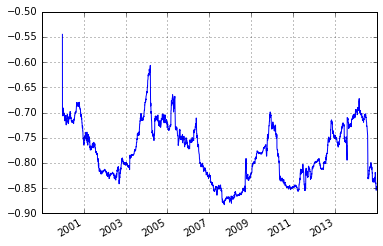

In [83]:
pd.rolling_corr(rets['EUROSTOXX'], rets['VSTOXX'], window=252).plot(grid=True, style='b') #计算移动相关性



In [84]:
import numpy as np
import pandas as pd
import datetime as dt
from urllib import urlretrieve
%matplotlib inline


In [95]:
url1 = 'http://www.netfonds.no/quotes/posdump.php?' #两段地址，从netfonds获取高频分笔数据
url2 = 'date=%s%s%s&paper=NKE.N&csv_format=csv'
url = url1 + url2
year = '2016'
month = '05'
days = ['03','04','05','06','07']

In [96]:
NKE =  pd.DataFrame()
for day in days:
    NKE = NKE.append(pd.read_csv(url % (year, month, day), index_col=0, header=0, parse_dates=True))
NKE.columns = ['bid', 'bdepth', 'bdeptht', 'offer', 'odepth', 'odeptht']


将分笔数据变成5分钟数据

In [98]:
NKE_resam = NKE.resample(rule='5min', how='mean') #将分笔数据变成5分钟数据
np.round(NKE_resam.head(), 2)
NKE_resam['bid'].fillna(method='ffill').plot(grid=True) #补充买盘价格，画图
# tag: aapl_resam
# title: Resampled Apple stock tick data

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
bid        0 non-null object
bdepth     0 non-null object
bdeptht    0 non-null object
offer      0 non-null object
odepth     0 non-null object
odeptht    0 non-null object
dtypes: object(6)
memory usage: 0.0+ bytes
